# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* ['X'] YES - make available
* [  ] NO - keep private

# Overview

In any service based company, there is a wide range of user demographics who must be catered to. In specifc, companies like Netflix, Amazon, and Spotify all embody this idea strongly. Our project decided to make use of the Spotify API, which provides a wide range of their own defined features for songs, in order to identify new, unique listening personas in order to help drive new product developement.

# Names

- Mateo Ignacio
- Samuel Piltch
- Nate del Rosario 🐐
- Lisa Hwang
- Geovaunii D. White

<a id='research_question'></a>
# Research Question

Since we’ve never worked with audio data or classification of audio data we wanted to try working with data that is structured as such. 
We ask the question: how do the audio features from songs, specifically Spotify Tracks compare to each other? 

Is there a relationship between the some of these features such as tempo correlating with danceability/energy/liveness and if so how are they correlated. Additionally, how can we use these features to cluster songs based on these audio tracks of songs being coverted to numeric features?

<a id='background'></a>

## Background & Prior Work

In our project, we will look for a multicollinearity relationship between the characteristics of songs such as tempo and danceability and energy. Although songs are not made scientifically there are obvious intentions when making music to fit a specific sound or genre. The data generating process comes from the Spotify API which provides us numeric data on songs and artists. With this we will try to classify songs based on their computational similarities. 

Ultimately, we will be working to create an algorithm that can can cluster songs based on the differences in audio features between different genres. This type of model has been before for uses in recommender systems and identifying user personas.

Clustering based on musical similarities is actually the fundamental thought behind Spotify’s own recommender. In [this video](https://www.youtube.com/watch?v=Q8W2IGiSdhc) the the creator of the Spotify recommended system, Erik Berhardsson, [describes his creative process and describes using matrix factorization to find similarities of songs which through interactions with users and their qualities](https://erikbern.com/2013/12/20/more-insight-into-recommender-algorithms.html). With this method genres cluster well meaning this evaluation of similarity works. He then used a method of approximate nearest neighbors where he could find similar tracks from the vector representations of these songs and their qualities and user interactions with the songs.

The data can be found [here](https://charts.spotify.com/charts/view/regional-global-weekly/latest).

The documentation can be found [here](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features).

# Hypothesis


Certain audio features will be statistically different between the distribution of certain genres. 

For example, the mean "tempo" of Pop Artists will be higher than that of Ballad Singers since Pop songs tend to be more upbeat and fast. 

**Here is where we lost points, so we have made our hypothesis more thorugh and specific about the features and their relationships**

If numerical data is extracted from the songs then models can be trained to cluster / classify songs into different groups since there will be enough difference between certain features between certain groups. Because we are working with unlabled data, we believe that we can utilize these differences in distributions to perform Unsupervised Learning on the data to cluster the songs into different listening personas, which is different from the 'taboo' approach of just predicting song features (which is not as useful as identifying listening personas). This approach of comparing audio features between two groups can then be applied to other projects such as comparisons of living beings/objects to classify the two.

# Dataset(s)

- Dataset Name: Spotify Weekly Top 200
- Link to the dataset: [data scraped here](https://charts.spotify.com/charts/view/regional-global-weekly/latest)
- Number of observations: 2554 rows × 14 columns

The dataset consists of 2554 rows, some of which are duplicate songs (songs that chart multiple times in a week). 

# Setup

In [3]:
#import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2

In [7]:
charts = pd.read_csv('../data/songs.csv')
charts

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,'Til You Can't,Cody Johnson,0.501,0.815,1.0,1.0,-4.865,0.0436,0.05130,0.000000,0.1060,0.4600,160.087,224213.0
1,'Till I Collapse,"Eminem, Nate Dogg",0.548,0.847,1.0,1.0,-3.237,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,297787.0
2,(Don't Fear) The Reaper,Blue Öyster Cult,0.333,0.927,9.0,0.0,-8.550,0.0733,0.00290,0.000208,0.2970,0.3850,141.466,308120.0
3,(Everybody's Waitin' For) The Man With The Bag...,Kay Starr,0.739,0.317,0.0,1.0,-8.668,0.0905,0.39100,0.004870,0.2430,0.8060,71.165,162373.0
4,(There's No Place Like) Home for the Holidays ...,Perry Como,0.478,0.341,5.0,1.0,-12.556,0.0511,0.89700,0.000000,0.2580,0.4740,143.736,175893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,you broke me first,Tate McRae,0.667,0.373,4.0,1.0,-9.389,0.0500,0.78500,0.000000,0.0906,0.0823,124.148,169266.0
2550,¿Por Qué Me Haces Llorar?,Juan Gabriel,0.647,0.477,0.0,1.0,-8.157,0.0342,0.03740,0.000010,0.1270,0.7930,112.041,182880.0
2551,¿Quién Te Crees?,"MC Davo, Calibre 50",0.747,0.780,9.0,0.0,-5.302,0.2160,0.05830,0.000000,0.1640,0.5380,82.524,185493.0
2552,Éxtasis,"Millonario & W. Corona, Cartel De Santa",0.937,0.791,0.0,1.0,-5.242,0.0871,0.02050,0.000232,0.0433,0.9740,119.967,289013.0


# Data Cleaning

Since we are dealing with features of different scales, we will have to 
- normalize the columns
- add a column for tempo names by binning each 'tempo' accordingly
- convert the 'duration' from seconds to minutes

In [8]:
def return_tempo(tempo):
    """
    Returns a number corresponding to a categorical class for each tempo
    These tempos align with the standard names used in music composition
    """
    if tempo < 60:
        return 0
    elif tempo < 90:
        return 1 / 6
    elif tempo < 110:
        return 2 / 6
    elif tempo < 120:
        return 3 / 6
    elif tempo < 160:
        return 4 / 6
    elif tempo < 180:
        return 5 / 6
    else:
        return 6 / 6
        
charts = charts.assign(tempo_name = charts['tempo'].apply(return_tempo))

In [9]:
# define our features
features_array = np.array(charts.columns)
features = np.delete(features_array, [0, 1])
features

array(['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'tempo_name'], dtype=object)

In [10]:
# convert milliseconds to minutes
charts = charts.assign(duration_min = charts['duration'] / 60000).drop(columns=['duration'])

# feature scaling
scaler = MinMaxScaler()
scaler.fit(np.array(charts[['tempo', 'loudness', 'duration_min', 'key', 'mode']]))
charts[['tempo', 'loudness', 'duration_min', 'key', 'mode']] = scaler.transform(np.array(charts[['tempo', 'loudness', 'duration_min', 'key', 'mode']]))

# Scaled!
charts

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tempo_name,duration_min
0,'Til You Can't,Cody Johnson,0.501,0.815,0.090909,1.0,0.858052,0.0436,0.05130,0.000000,0.1060,0.4600,0.710372,0.833333,0.286447
1,'Till I Collapse,"Eminem, Nate Dogg",0.548,0.847,0.090909,1.0,0.911176,0.1860,0.06220,0.000000,0.0816,0.1000,0.777751,0.833333,0.398980
2,(Don't Fear) The Reaper,Blue Öyster Cult,0.333,0.927,0.818182,0.0,0.737804,0.0733,0.00290,0.000208,0.2970,0.3850,0.599926,0.666667,0.414785
3,(Everybody's Waitin' For) The Man With The Bag...,Kay Starr,0.739,0.317,0.000000,1.0,0.733953,0.0905,0.39100,0.004870,0.2430,0.8060,0.182955,0.166667,0.191861
4,(There's No Place Like) Home for the Holidays ...,Perry Como,0.478,0.341,0.454545,1.0,0.607081,0.0511,0.89700,0.000000,0.2580,0.4740,0.613390,0.666667,0.212540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,you broke me first,Tate McRae,0.667,0.373,0.363636,1.0,0.710426,0.0500,0.78500,0.000000,0.0906,0.0823,0.497209,0.666667,0.202404
2550,¿Por Qué Me Haces Llorar?,Juan Gabriel,0.647,0.477,0.000000,1.0,0.750628,0.0342,0.03740,0.000010,0.1270,0.7930,0.425400,0.500000,0.223227
2551,¿Quién Te Crees?,"MC Davo, Calibre 50",0.747,0.780,0.818182,0.0,0.843792,0.2160,0.05830,0.000000,0.1640,0.5380,0.250328,0.166667,0.227223
2552,Éxtasis,"Millonario & W. Corona, Cartel De Santa",0.937,0.791,0.000000,1.0,0.845750,0.0871,0.02050,0.000232,0.0433,0.9740,0.472411,0.500000,0.385560


Check for missingness

In [11]:
for col in charts.columns:
    num_NaN = charts[col].isna().sum()
    print("Are there any NaN's?")
    if num_NaN == 0:
        print('No')

Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No
Are there any NaN's?
No


# Data Analysis & Results

### Scatter Matrix

We created a scatter matrix between continuous variables.

In [8]:
fig = px.scatter_matrix(charts.drop(columns=['key', 'mode', 'duration_min', 'track_name', 'artist_names', 'tempo_name']), 
    width = 900, 
    height = 900)
fig.update_traces(marker=dict(size=3, color='rgb(200, 162, 236)', line=dict(width=0.2, color='black')))
fig.update_layout(font_size = 8, title='Scatter Matrix of Continuous Features')
fig.show()

Based on our Scatter Matrix, we can see that some features appear to be not correlated at all, while some features do appear to have some correlation. To quantify this, we will create a heatmap of the correlation matrix between all the features so we can assign numerical values to what we see.

### Heatmap

In [9]:
# Create a correlation matrix
corr = charts.corr().drop('tempo_name').drop(columns = ['tempo_name'])

# Convert the correlation matrix to a 1D array
corr_arr = np.array(corr)

# Create a heatmap
heatmap = ff.create_annotated_heatmap(
    z=corr_arr,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr_arr.round(2),
    showscale=True,
    colorscale='Purp',
)

# Add title
heatmap.update_layout(title_text='Correlation Heatmap of Audio Features',
                      title_x=0.5,
                      title_font=dict(size=14),
                      )

# Display the heatmap
heatmap.show()

### Scatter Plots with Regression Lines

In this section we are exploring the relationship between the most positively/negatively correlated variables from the previous section. Specifically, we analyze the relationships between the acousticness, energy, and loudness of various songs.

Text(0, 0.5, 'Energy')

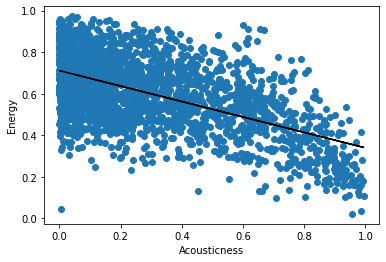

In [10]:
cont = charts.drop(columns=['key', 'mode', 'duration_min', 'track_name', 'artist_names', 'tempo_name'])
plt.plot(cont['acousticness'], cont['energy'], 'o')
m, b = np.polyfit(cont['acousticness'], cont['energy'], 1)
plt.plot(cont['acousticness'], m*cont['acousticness']+b, color = 'black')
plt.xlabel('Acousticness')
plt.ylabel('Energy')

Energy and acousticness are negatively correlated.

Text(0, 0.5, 'Energy')

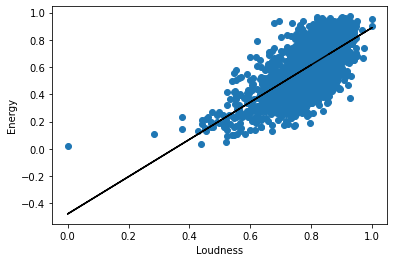

In [11]:
plt.plot(cont['loudness'], cont['energy'], 'o')
m, b = np.polyfit(cont['loudness'], cont['energy'], 1)
plt.plot(cont['loudness'], m*cont['loudness']+b, color = 'black')
plt.xlabel('Loudness')
plt.ylabel('Energy')

Loudness and energy are positively correlated.

Text(0, 0.5, 'Acousticness')

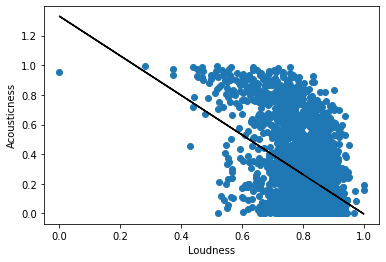

In [12]:
plt.plot(cont['loudness'], cont['acousticness'], 'o')
m, b = np.polyfit(cont['loudness'], cont['acousticness'], 1)
plt.plot(cont['loudness'], m*cont['loudness']+b, color = 'black')
plt.xlabel('Loudness')
plt.ylabel('Acousticness')

Loudness and acousticness are negatively correlated.

Lets see another visualization, this time considering the distribution of every feature.

<AxesSubplot:>

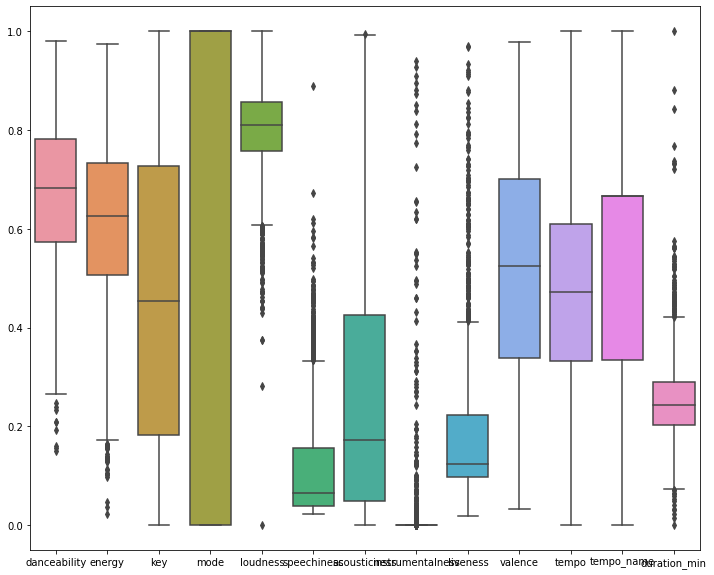

In [13]:
plt.figure(figsize=(12,10))
sns.boxplot(data=charts)

Ok that didn't work as expected, let's try to reduce it to the most telling box and whisker plots. 

<AxesSubplot:>

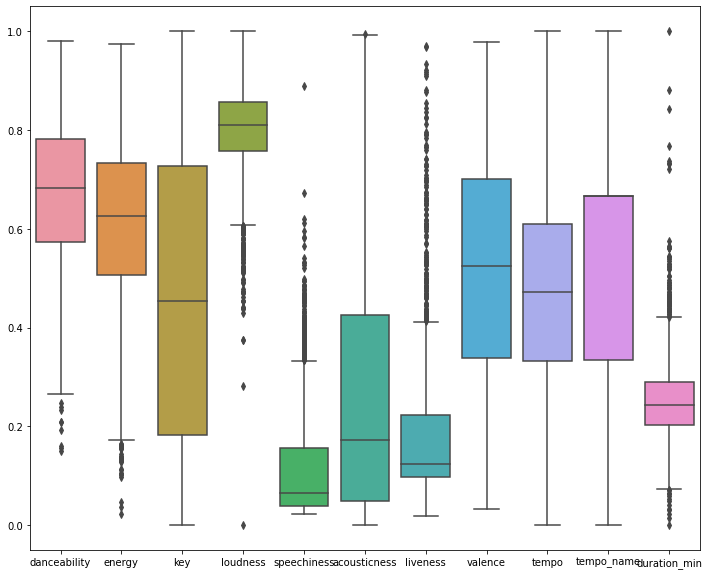

In [14]:
plt.figure(figsize=(12,10))
numeric_df = charts.drop(['mode', 'instrumentalness'], axis = 1)
sns.boxplot(data=numeric_df)

We see interesting findings like the loudness is constantly above a 6. Obviously music is made at different levels of loudness, but also this can be related to the mixing and mastering process of when these songs are produced they are treated differently in the mastering process. When a song is recorded and the sound engineers are working on the raw tracks, there is a lower limit of how quiet a song should be. If a song is quiet, like a whisper level that would be jarring and sound unfinished or wrong. Also there is a lower limit to danceability meaning every song is dancable with the right people. /j

## Feature Significance

### PCA

In an attempt to reduce the number of features and make sure they are uncorrelated our first approach was to use PCA. This would show which features are most responsible for the variance and it works since our features are mostly numerical. BUT this made the data uninterpretable and instead we will use a correlation threshold to 

In [12]:
# review what columns we have
charts.columns

Index(['track_name', 'artist_names', 'danceability', 'energy', 'key', 'mode',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'tempo_name', 'duration_min'],
      dtype='object')

In [79]:
numeric_df.corr()>.3


,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
danceability,True,False,False,False,False,False,False,False,False,True,False,False
energy,False,True,False,False,True,False,False,False,False,True,False,False
key,False,False,True,False,False,False,False,False,False,False,False,False
mode,False,False,False,True,False,False,False,False,False,False,False,False
loudness,False,True,False,False,True,False,False,False,False,False,False,False
speechiness,False,False,False,False,False,True,False,False,False,False,False,False
acousticness,False,False,False,False,False,False,True,False,False,False,False,False
instrumentalness,False,False,False,False,False,False,False,True,False,False,False,False
liveness,False,False,False,False,False,False,False,False,True,False,False,False
valence,True,True,False,False,False,False,False,False,False,True,False,False


In [68]:
import pandas as pd
from sklearn.decomposition import PCA

# Perform PCA on only numerical columns; tempo_name is dependent on tempo, 
# and since it is Missing By Design, we can recover its importance through the
# tempo column
numeric_df = charts[['danceability', 'energy', 'key', 'mode',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_min']]
pca = PCA()
principalComponents = pca.fit_transform(numeric_df)

# You can inspect the explained variance ratio for each component
eigen_vals = pca.explained_variance_
print(f'Eigan Values:{eigen_vals}')
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

# Transform the principal components into a DataFrame
# df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
# df_comp = pd.DataFrame(pca.components_, columns=['danceability', 'energy', 'key', 'mode',
#        'loudness', 'speechiness', 'acousticness', 'instrumentalness',
#        'liveness', 'valence', 'tempo', 'duration_min'])

Eigan Values:[0.24178496 0.10563611 0.08893938 0.05468547 0.03264388 0.02189293
 0.01705968 0.01310424 0.01060709 0.00617075 0.00611061 0.0029246 ]
Explained Variance: [0.40193012 0.1756037  0.14784797 0.09090614 0.0542654  0.03639361
 0.02835909 0.02178378 0.01763265 0.01025792 0.01015794 0.00486169]


In [69]:
explained_variance[:3].sum()

0.7253817847800758

After seeing the explained variance we see the first 3 principal components are most important to explaining the variance of the data points. By summing the first 3 we can see that they explain 72.5% of the variance.

This is good but the PCA transformed data is now uninterpretable so this will not suffice as a feature selection method. 

In [80]:
n_pca = PCA(n_components=3)
n_pca.fit(numeric_df)
exp_var_eigenvals = n_pca.explained_variance_
exp_var_pct = n_pca.explained_variance_ratio_
reduced_songs = n_pca.transform(numeric_df)
reduced_songs

array([[-0.43295566,  0.23378689, -0.34507694],
       [-0.42720099,  0.28839088, -0.27785348],
       [ 0.66714076, -0.25792902, -0.11581531],
       ...,
       [ 0.69141034, -0.2859455 , -0.12867622],
       [-0.4201248 ,  0.19822244, -0.59028627],
       [-0.4321894 ,  0.21974789, -0.54325142]])

This is great, but notice how we did not include the artist names and track names. Will artist name be a useful categorical feature? We think it is likely since artists of similar genres may have similar Cosine Similarity. Going forward, we will one hot encode **'artist_names'** for our unsupervised clustering models.

## Clustering

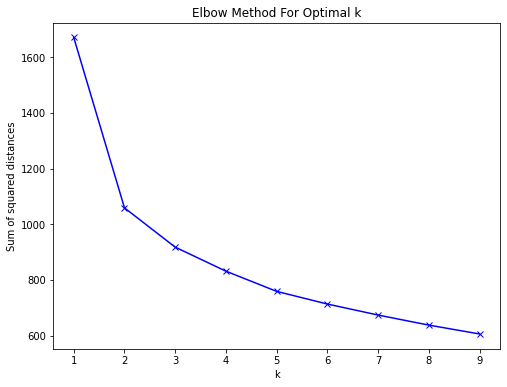

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine a reasonable range for k values
k_values = range(1, 10)

# Compute sum of squared distances for each k
ssd = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(charts.drop(columns=['track_name', 'artist_names']))
    ssd.append(kmeans.inertia_)  # inertia: sum of squared distances to closest centroid

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [16]:
from sklearn.cluster import KMeans

# Assume that you've found an optimal k using the Elbow method
optimal_k = 3  # fill this in

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(charts.drop(columns=['track_name', 'artist_names']))


In [17]:
# Create radar chart
fig = go.Figure()

# Add a line for each cluster center
for i in range(optimal_k):
    fig.add_trace(go.Scatterpolar(
        r=kmeans.cluster_centers_[i],
        theta=charts.columns,
        fill='toself',
        name=f'Cluster {i+1}'
    ))

# Update layout
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[-3, 3])),
    showlegend=True
)

fig.show()


In [18]:


numeric_columns = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min']

# Define optimal number of clusters
optimal_k = 2  # fill this in

# Perform K-means on the numeric columns
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
charts['cluster'] = kmeans.fit_predict(charts[numeric_columns])

# Group by cluster and create a summary for the hover text
df_grouped = charts.groupby('cluster').agg(artist_names=('artist_names', ', '.join), 
                                        track_name=('track_name', ', '.join)).reset_index()

# Create radar chart
fig = go.Figure()

# Add a line for each cluster center
for i in range(optimal_k):
    fig.add_trace(go.Scatterpolar(
        r=kmeans.cluster_centers_[i],
        theta=numeric_columns,
        fill='toself',
        name=f'Cluster {i+1}',
        hovertext=df_grouped[df_grouped.cluster == i][['artist_names', 'track_name']].values,
        hoverinfo="text"
    ))

# Update layout
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[-3, 3])),
    showlegend=True
)

fig.show()


In [19]:
# Select features for clustering
features = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min']

# Perform K-means on the standardized data
kmeans = KMeans(n_clusters=optimal_k, random_state=0)  # Choose an appropriate number for optimal_k
clusters = kmeans.fit_predict(charts[features])

# Add cluster assignments to the original DataFrame
charts['cluster'] = clusters

# Create a radar chart
fig = go.Figure()

# Add a line for each song
for i, row in charts.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[features],
        theta=features,
        name=row['track_name'],
        hovertemplate=
            "Artist: %{name}<br>" +
            "Track: %{customdata[0]}<br>" +
            "Cluster: %{customdata[1]}",
        customdata=[row['artist_names'], row['cluster']],
        marker_color=row['cluster'],  # Color points by their cluster
        mode='markers',
        marker=dict(size=8, line=dict(width=2))
    ))

# Update layout
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[-2, 2])),
    showlegend=False  # Disable legend because it could become large with many songs
)

fig.show()


# Soft Clustering and Gaussian Mixture Models

Another clustering method is the Gaussian Mixture Models. However, it would only be appropriate if the data points were mixtures of Gaussian (normal) distributions. To see if this is the case for the songs data set, first K-means algorithm should be performed to look for clusters assignments to then use for Gaussian Mixture. 

In [81]:
from sklearn.mixture import GaussianMixture
features = ['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min']
gmm = GaussianMixture(n_components=optimal_k).fit(reduced_songs)
labels = gmm.predict(reduced_songs)



In [91]:
df_pca = pd.DataFrame(data = reduced_songs, columns = ['PC1', 'PC2', 'PC3'])

,PC1,PC2,PC3
0,-0.432956,0.233787,-0.345077
1,-0.427201,0.288391,-0.277853
2,0.667141,-0.257929,-0.115815
3,-0.467160,0.385810,0.002084
4,-0.440671,0.136550,0.652282
...,...,...,...
2549,-0.436037,0.250817,0.595457
2550,-0.448462,0.303652,-0.325813
2551,0.691410,-0.285946,-0.128676
2552,-0.420125,0.198222,-0.590286


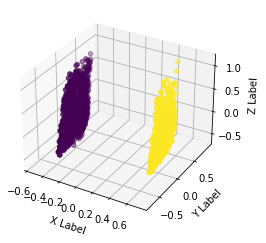

In [95]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],c = labels, cmap = "viridis")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# Ethics & Privacy

There are many ethical concerns in the industry of music streaming, such as the income of musicians (especially independent artists).

Spotify's Code of Conduct is posted publicly [^3], where they claim that they comply with laws and are fully fair and in line with their interests. Additionally, they provide many links for contact if any individual suspects fraud or theft of Spotify assets. Spotify has a separate Privacy Policy, where they go into detail of the personal rights of users [^4]. 

There is potential for bias in the Spotify weekly charts, as popular artists are more likely to have a significant following, leading to an overrepresentation in the charts. Therefore, independent and/or lesser known artists do not have the same opportunities. Promotion from record labels who can afford to advertise their artists/songs would have the upper hand in this field. Additionally, we do not know the specifics of the algorithms used to generate Spotify's charts, which would potentially harbor bias in its model. 

Much of these are out of control, and since Spotify has made the Data Publicly available about the artists, and we are not directly working with individual user data, we assume that all practices are legel.

[^3]: https://s29.q4cdn.com/175625835/files/doc_downloads/gov-docs/Spotify-Code-of-Conduct-and-Ethics-(Updated-2020).pdf 

[^4]: https://www.spotify.com/us/legal/privacy-policy/

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*